In [5]:
!pip -q install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.8/677.8 kB 8.6 MB/s eta 0:00:00


In [6]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [25]:
from matplotlib import pyplot as plt
import os
from PIL import Image as img

In [7]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)
!pip install -q pylabel > /dev/null
from pylabel import importer
import os
import zipfile

Coco2Yolo transformer
https://github.com/akarazniewicz/cocosplit/tree/master

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
dataDir = 'drive/MyDrive/Colab Notebooks/the_lovely_bones/data/FracAtlas/images/Fractured/'
ann_path = 'drive/MyDrive/Colab Notebooks/the_lovely_bones/data/FracAtlas/Annotations/COCO JSON/COCO_fracture_masks.json'

In [10]:
#Specify path to the coco.json file
path_to_annotations = ann_path
#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = dataDir

#Import the dataset into the pylable schema
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="bones")
dataset.df.head(5)


,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_iscrowd,ann_keypoints,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,drive/MyDrive/Colab Notebooks/the_lovely_bones...,IMG0000019.jpg,,1,2304,2880,,,1242.297030,929.108911,...,0,,,,,0,fractured,,,1
1,drive/MyDrive/Colab Notebooks/the_lovely_bones...,IMG0000025.jpg,,2,2880,2304,,,1466.504519,2010.557108,...,0,,,,,0,fractured,,,1
2,drive/MyDrive/Colab Notebooks/the_lovely_bones...,IMG0000044.jpg,,3,2304,2880,,,1426.511093,1072.013147,...,0,,,,,0,fractured,,,1
3,drive/MyDrive/Colab Notebooks/the_lovely_bones...,IMG0000057.jpg,,4,2304,2880,,,1130.613861,1119.207921,...,0,,,,,0,fractured,,,1
4,drive/MyDrive/Colab Notebooks/the_lovely_bones...,IMG0000058.jpg,,5,2304,2880,,,1190.019802,1349.702970,...,0,,,,,0,fractured,,,1


In [11]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")
print(f"Path to annotations:\n{dataset.path_to_annotations}")

Number of images: 717
Number of classes: 1
Classes:['fractured']
Class counts:
fractured    922
Name: cat_name, dtype: int64
Path to annotations:
drive/MyDrive/Colab Notebooks/the_lovely_bones/data/FracAtlas/Annotations/COCO JSON


In [12]:
dataset.path_to_annotations = ann_path
y_dataset = dataset.export.ExportToYoloV5()[0]

Exporting YOLO files...: 100%|██████████| 717/717 [00:01<00:00, 524.12it/s]


In [13]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
   creating: dataset/
  inflating: dataset/data.yaml       
   creating: dataset/train/
   creating: dataset/train/images/
  inflating: dataset/train/images/IMG0002324.jpg  
  inflating: dataset/train/images/IMG0002325.jpg  
  inflating: dataset/train/images/IMG0002326.jpg  
  inflating: dataset/train/images/IMG0002327.jpg  
  inflating: dataset/train/images/IMG0002328.jpg  
  inflating: dataset/train/images/IMG0002329.jpg  
  inflating: dataset/train/images/IMG0002330.jpg  
  inflating: dataset/train/images/IMG0002331.jpg  
  inflating: dataset/train/images/IMG0002332.jpg  
  inflating: dataset/train/images/IMG0002333.jpg  
  inflating: dataset/train/images/IMG0002334.jpg  
  inflating: dataset/train/images/IMG0002335.jpg  
  inflating: dataset/train/images/IMG0002336.jpg  
  inflating: dataset/train/images/IMG0002337.jpg  
  inflating: dataset/train/images/IMG0002338.jpg  
  inflating: dataset/train/images/IMG0002339.jpg  
  inflating: dataset/train/ima

In [16]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/dataset/data.yaml epochs=30 imgsz=640

Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/dataset/data.yaml, epochs=30, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

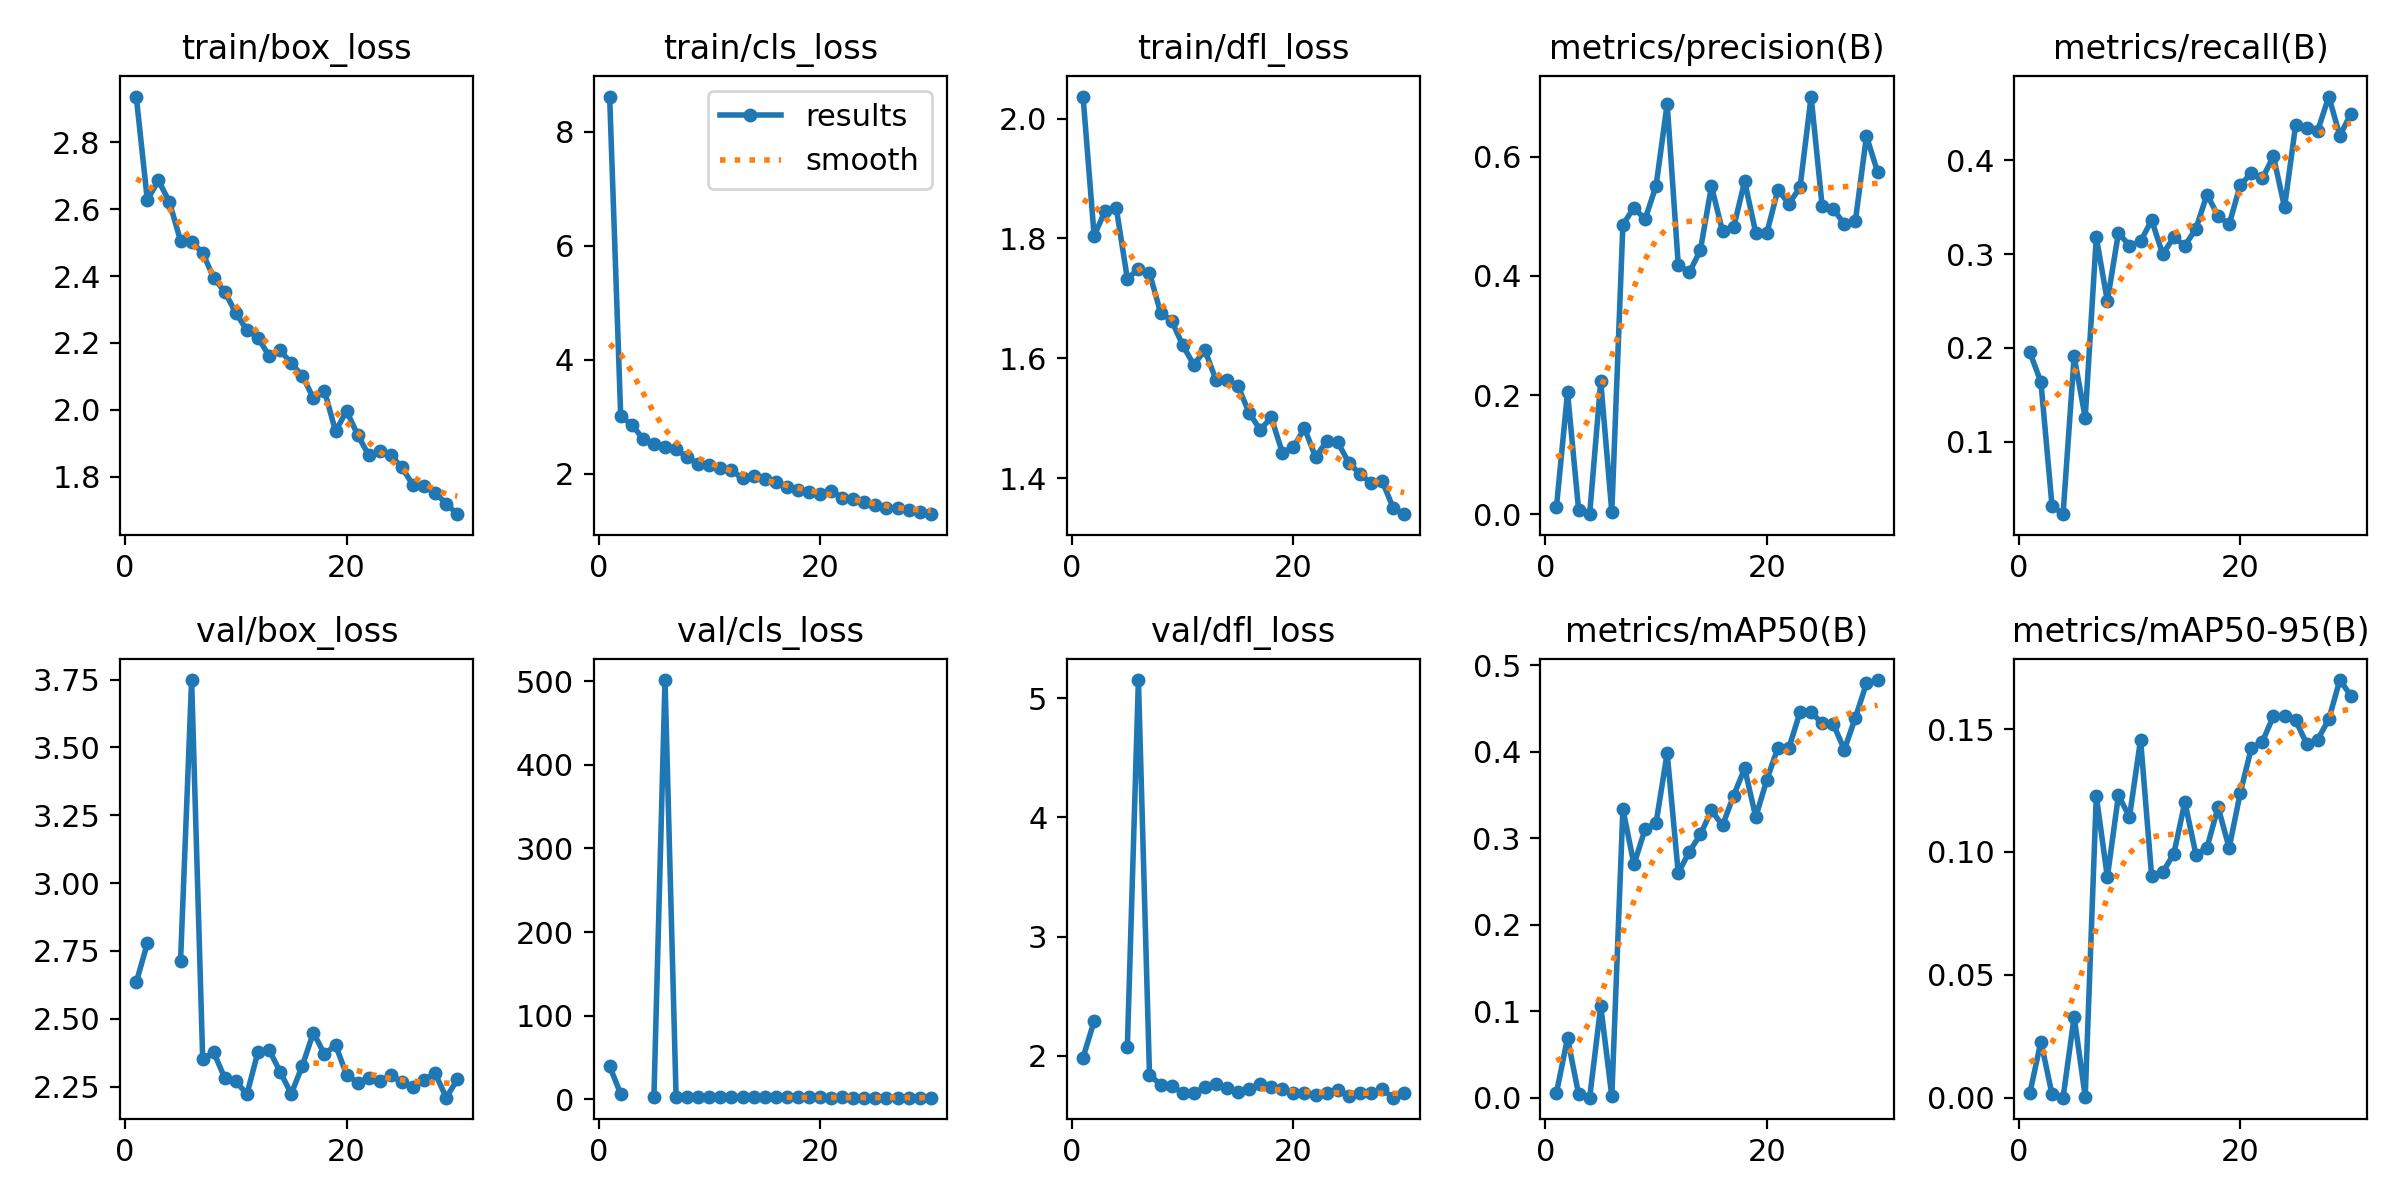

In [17]:
Image(filename="runs/detect/train3/results.png", width=600)

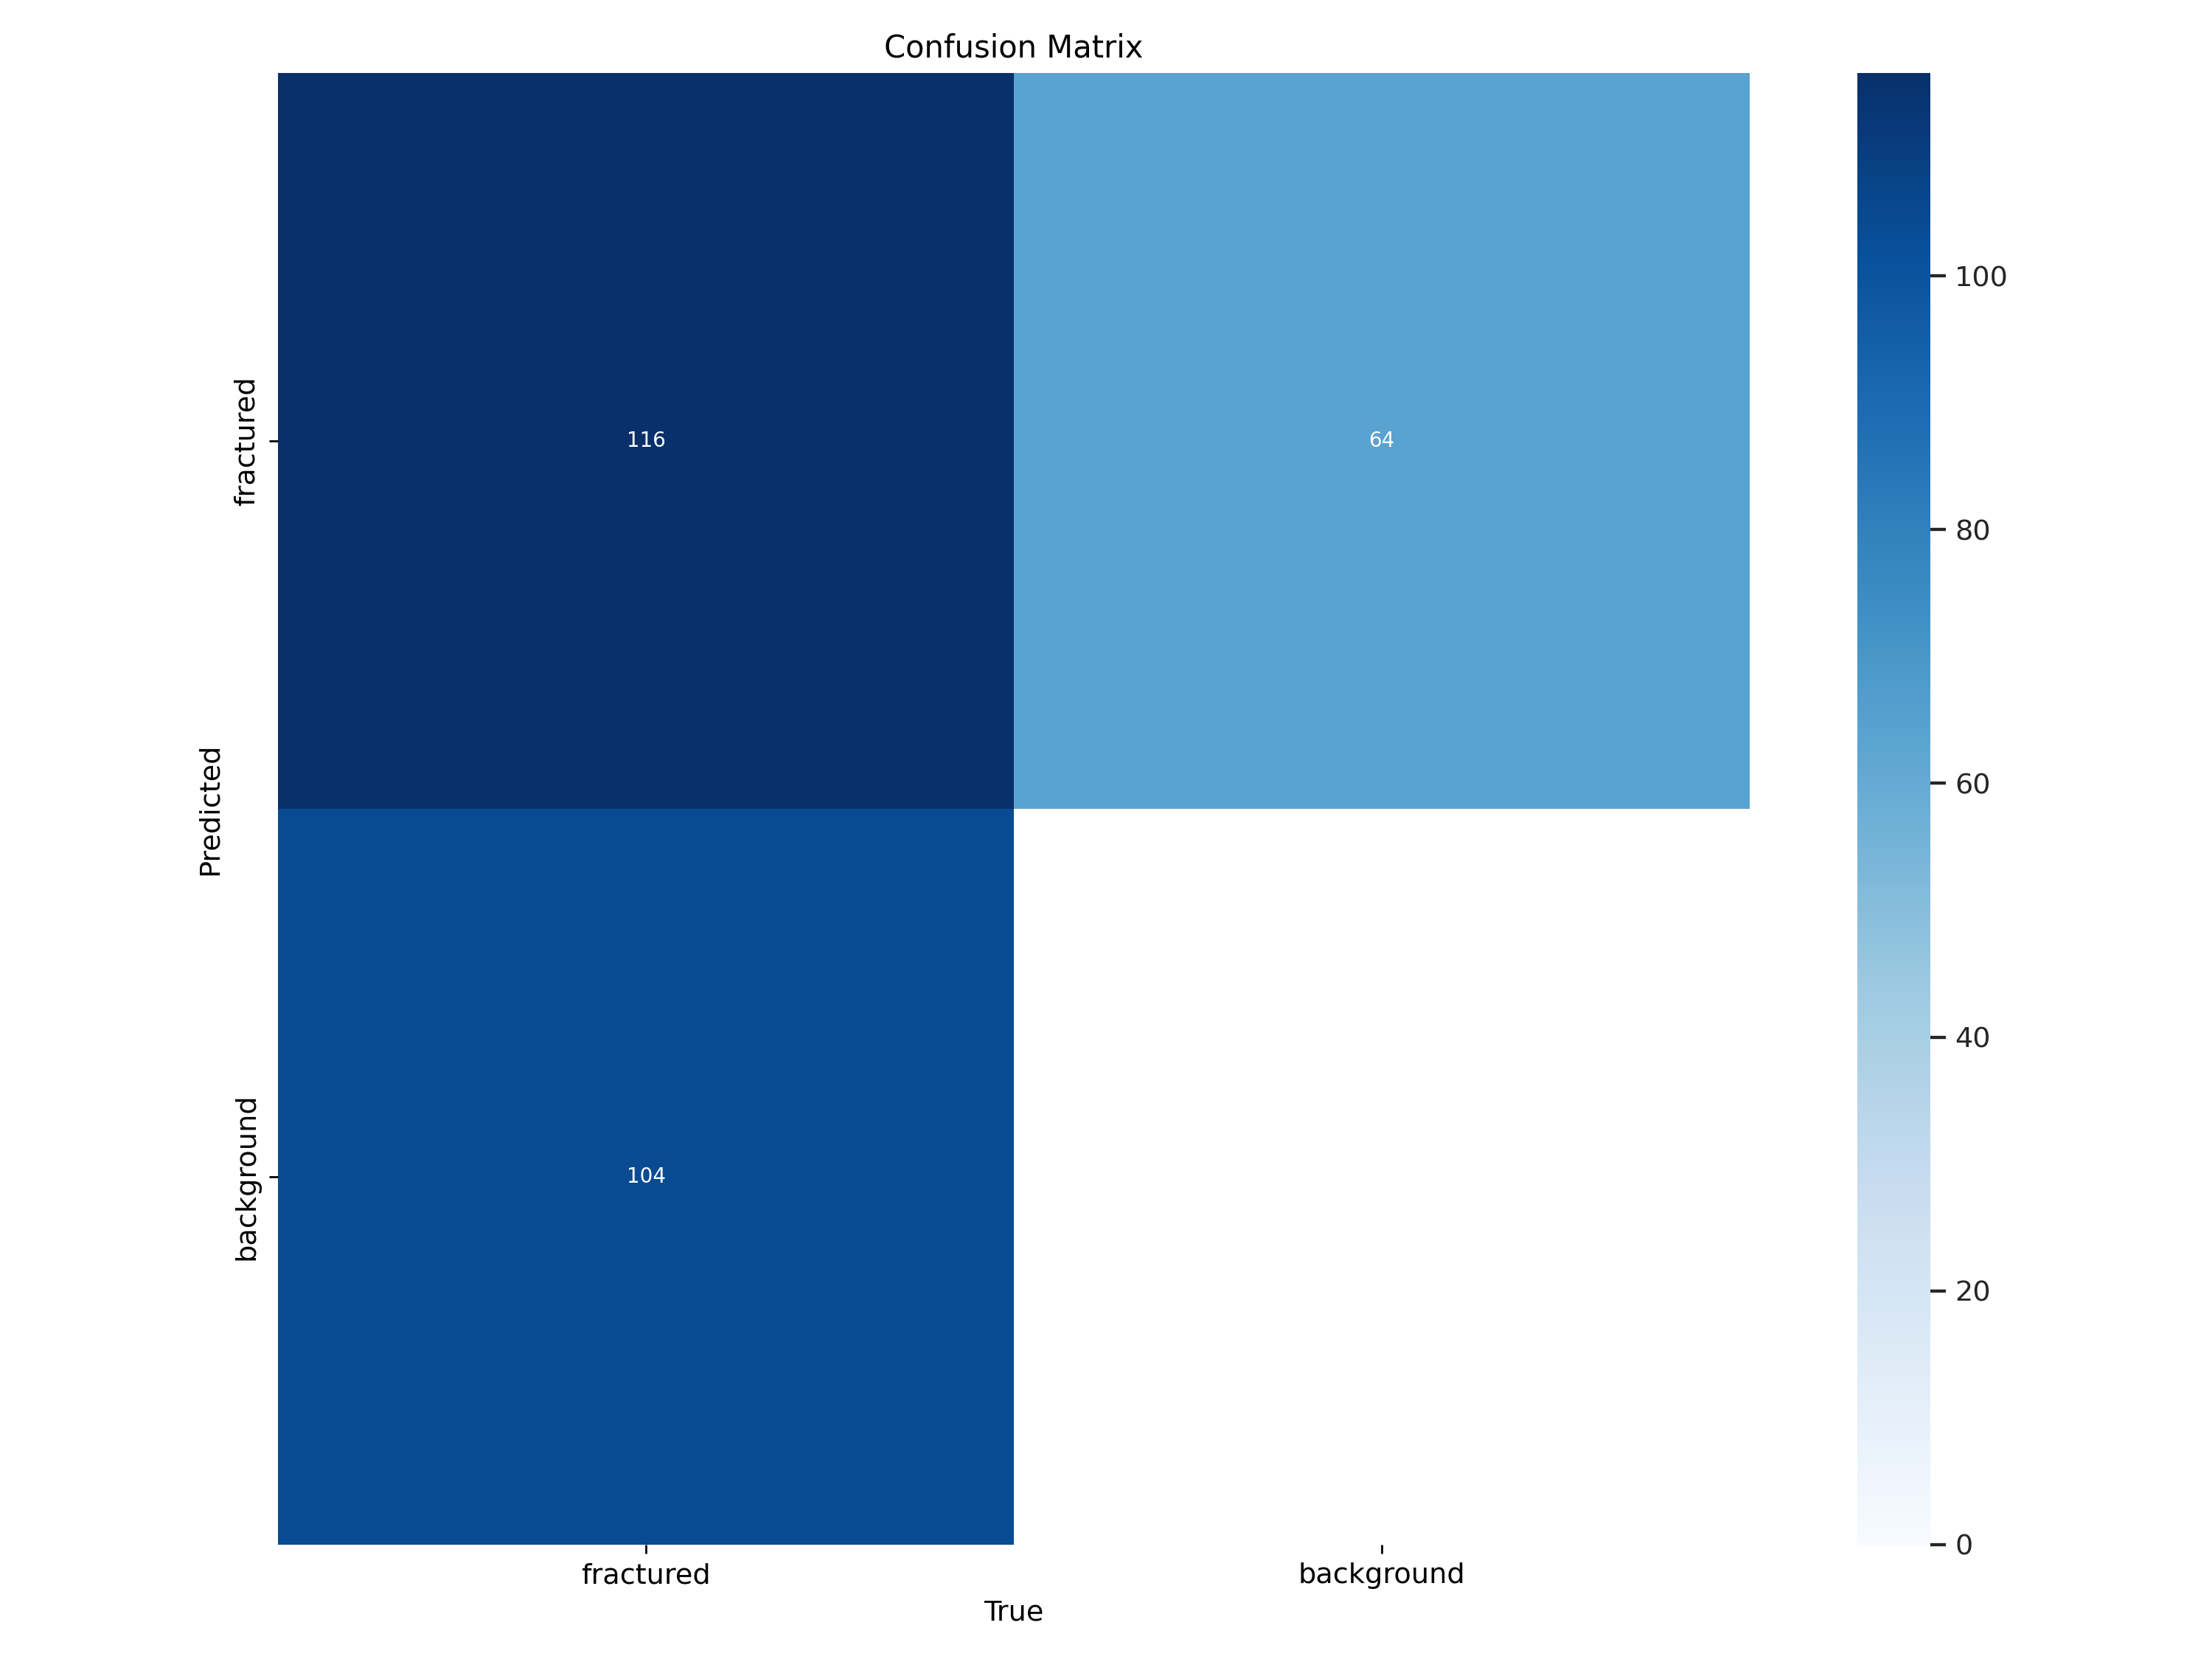

In [18]:
Image(filename="runs/detect/train3/confusion_matrix.png", width=600)

In [21]:
!yolo task=detect mode=predict save=True model=/content/runs/detect/train3/weights/best.pt conf=0.25 source=/content/dataset/test

Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/6 /content/dataset/test/10.jpg: 640x544 1 fractured, 166.2ms
image 2/6 /content/dataset/test/5.jpg: 640x544 3 fractureds, 15.9ms
image 3/6 /content/dataset/test/6.jpg: 640x512 3 fractureds, 118.5ms
image 4/6 /content/dataset/test/7.jpg: 640x544 3 fractureds, 16.5ms
image 5/6 /content/dataset/test/8.jpg: 640x544 1 fractured, 15.7ms
image 6/6 /content/dataset/test/9.jpg: 640x544 3 fractureds, 15.7ms
Speed: 3.9ms preprocess, 58.1ms inference, 147.9ms postprocess per image at shape (1, 3, 640, 544)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


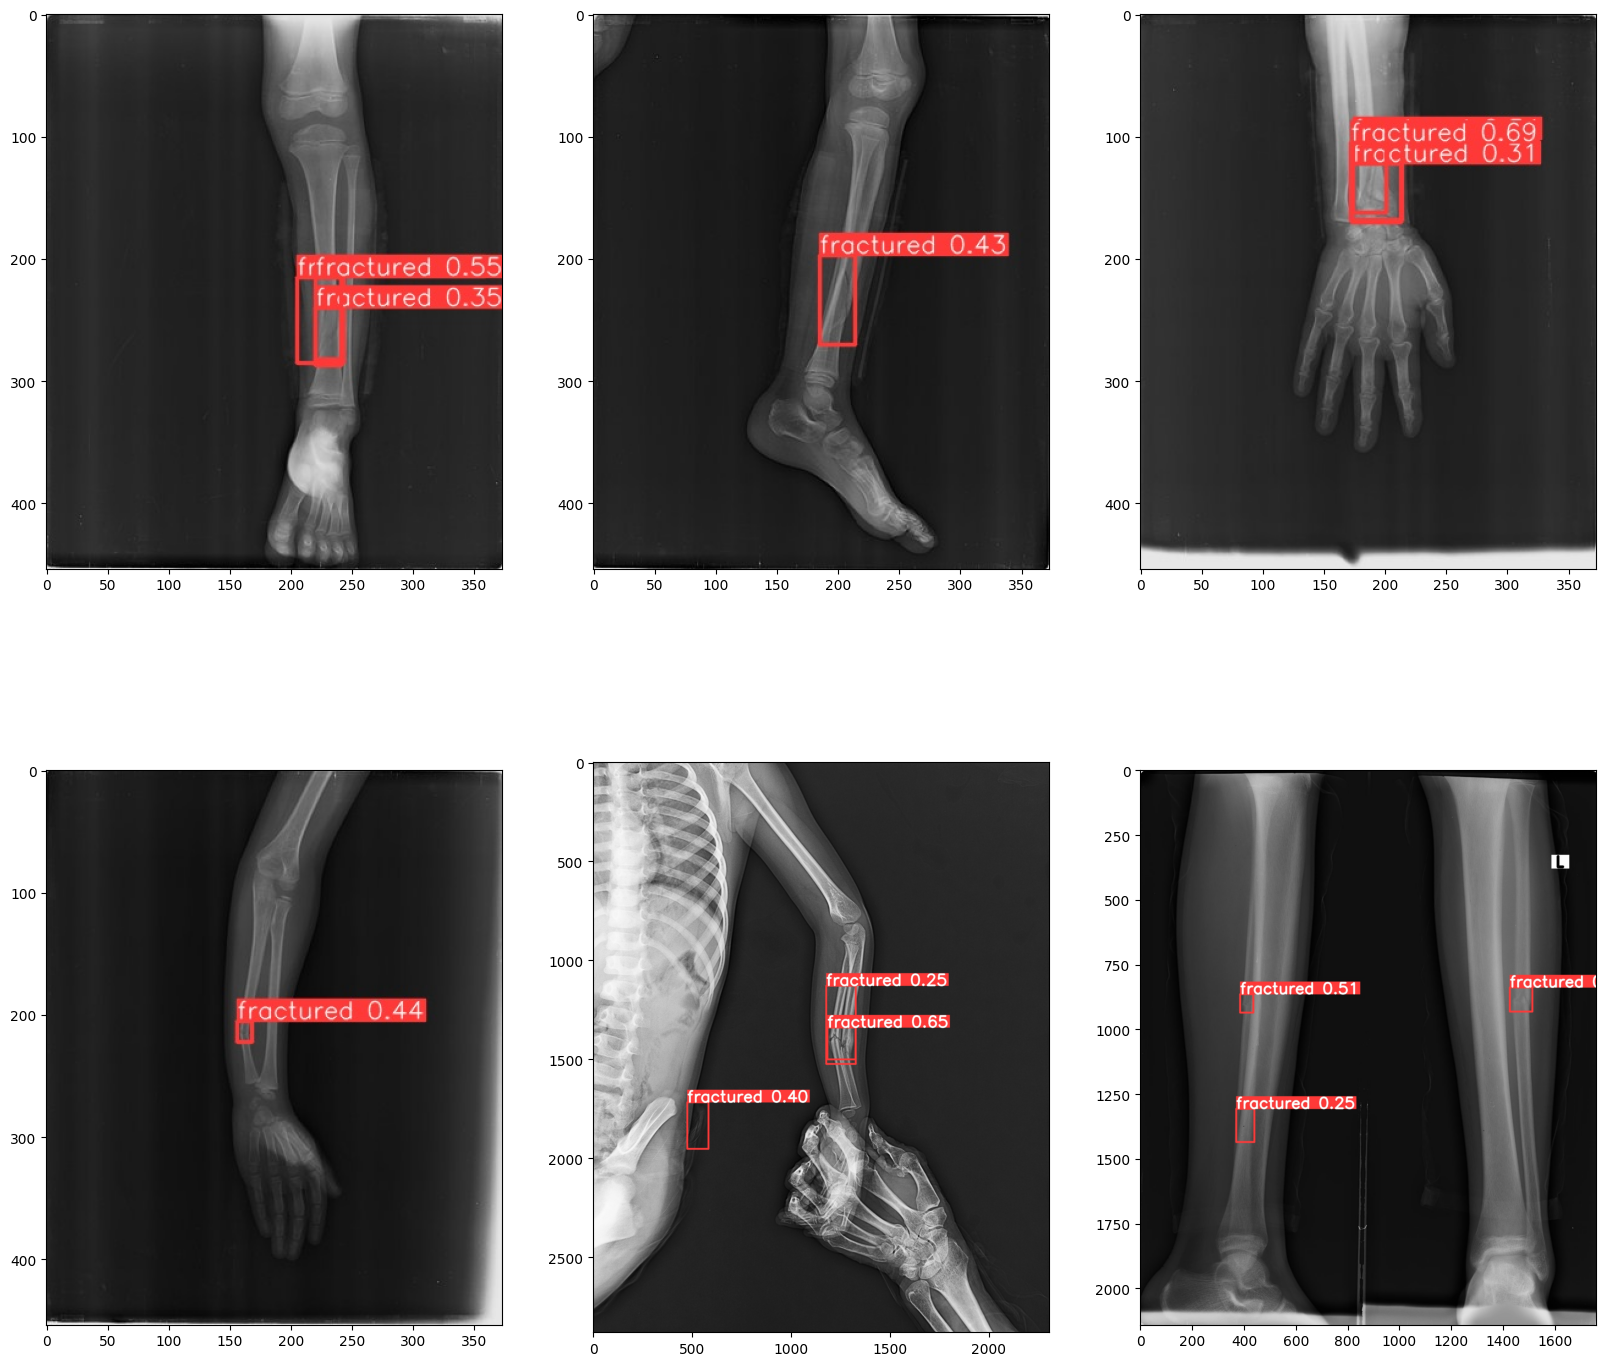

In [29]:
res_dir = "runs/detect/predict2/"
files = os.listdir(res_dir)
fig = plt.figure(figsize=(20,18))
for i in range(len(files)):
  fig.add_subplot(2, 3, i+1)
  look = img.open(res_dir + files[i])
  plt.imshow(look)
plt.show()